# Arago point


Here, we analyze how Arago point (also called Poisson spot) is generated using in XY and XYZ framework.

More information: https://www.lighttrans.com/use-cases/application-use-cases/observation-of-the-poisson-spot.html



## XY

In [1]:
from diffractio import np, plt, um, mm, nm, degrees
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

In [2]:
x0 = np.linspace(-200 * um, 200 * um, 512)
y0 = np.linspace(-200 * um, 200 * um, 1024)
wavelength = 532 * nm

In [3]:
u0 = Scalar_source_XY(x0, y0, wavelength)
u0.gauss_beam(r0=(0 * um, 0 * um), w0=130 * um, z0=0, A=1, theta=0.0)

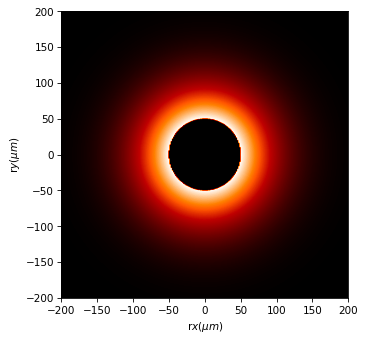

In [4]:
obstacle = Scalar_mask_XY(x0, y0, wavelength)
obstacle.circle(r0=(0 * um, 0 * um), radius=50 * um)
obstacle.inverse_amplitude()

u1 = u0 * obstacle

u1.draw()

In [5]:
arago_point = u1.RS(z=2 * mm)

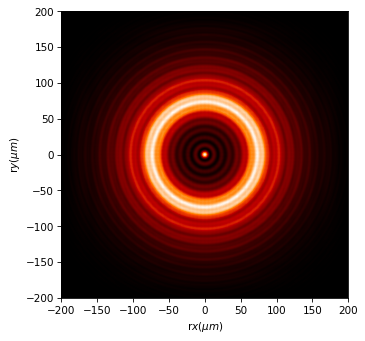

In [6]:
arago_point.draw(logarithm=True)

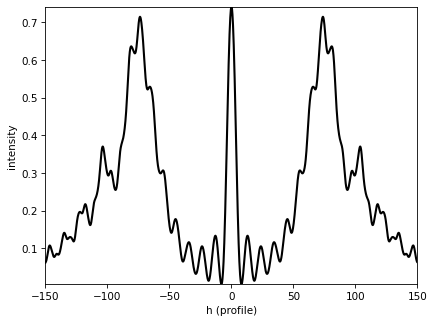

In [7]:
arago_point.draw_profile([-150, 0], [150, 0], npixels=2048, order=2)

## XYZ

In [8]:
from diffractio import np, plt, um, mm, nm, degrees
from diffractio.scalar_fields_XYZ import Scalar_field_XYZ
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY

In [9]:
import pyvista as pv

pv.set_jupyter_backend("static")

In [10]:
x0 = np.linspace(-200 * um, 200 * um, 512)
y0 = np.linspace(-200 * um, 200 * um, 256)
z0 = np.linspace(1 * mm, 2 * mm, 32)

wavelength = 532 * nm

In [11]:
u0 = Scalar_source_XY(x0, y0, wavelength)
u0.gauss_beam(r0=(0 * um, 0 * um), w0=130 * um, z0=0, A=1, theta=0.0)

In [12]:
obstacle = Scalar_mask_XY(x0, y0, wavelength)
obstacle.circle(r0=(0 * um, 0 * um), radius=50 * um)
obstacle.inverse_amplitude()

u1 = u0 * obstacle

In [13]:
u_xyz = Scalar_field_XYZ(x0, y0, z0, wavelength)

In [14]:
u_xyz.incident_field(u1)

In [15]:
u_xyz.RS(num_processors=1)

time in RS= 2.5367414951324463. num proc= 1


<Figure size 480x360 with 0 Axes>

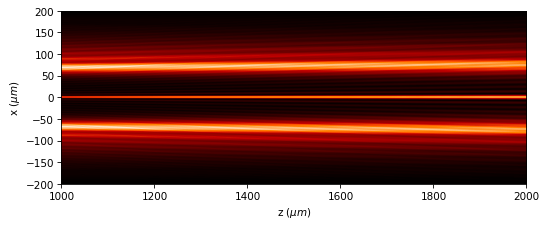

In [16]:
u_xyz.draw_XZ(y0=0)
fig = plt.gcf()
fig.set_size_inches(8, 3)

## XZ

**Warning**: The XZ results are **not valid** since, as it is an interferential process, radial symmetry is required. 

In [17]:
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_sources_X import Scalar_source_X

In [18]:
x0 = np.linspace(-200 * um, 200 * um, 1024)
z0 = np.linspace(1 * mm, 2 * mm, 512)
wavelength = 532 * nm

In [19]:
source_x = Scalar_source_X(x0, wavelength)
source_x.gauss_beam(x0=0, w0=130 * um, z0=0, A=1, theta=0.0)

In [20]:
mask_x = Scalar_mask_X(x0, wavelength)
mask_x.slit(x0=0, size=100 * um)
mask_x.u = 1 - mask_x.u

In [21]:
u1 = source_x * mask_x

In [22]:
arago_xz = Scalar_mask_XZ(x0, z0, wavelength)
arago_xz.incident_field(u1)

In [23]:
arago_xz.RS()

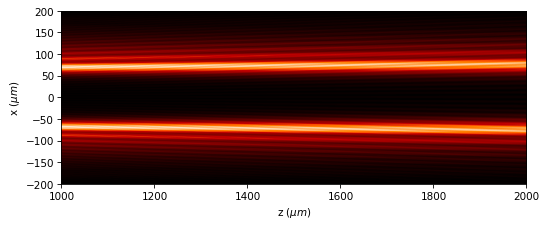

In [24]:
arago_xz.draw()
fig = plt.gcf()
fig.set_size_inches(8, 3)